### Analyzing Data on Inbound and Outbound Students (India)

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

#### First we retrieve data concerning the number of foreign students studying in India

In [2]:
tables = pd.read_html("https://www.mea.gov.in/lok-sabha.htm?dtl/29313/QUESTION+NO2755+INDIAN+STUDENTS+ABROAD")
table1 = tables[0]
table_ind = pd.DataFrame(table1)

##### Formatting the data for analysis

In [3]:
print(table_ind.shape)
table_ind.columns = table_ind.iloc[0]
table_ind = table_ind[1:]
table_ind.head()

(5, 3)


,Sl. No,Year,No. of foreign students came to India
1,1.,2014,65602
2,2.,2015,74061
3,3.,2016,72542
4,4.,2017 (upto 27.12.2017),69322


In [4]:
table_ind.drop('Sl. No', axis=1, inplace=True)
table_ind.columns = ['Year','Number of Students']

In [5]:
table_ind.at['4', 'Year'] = 2017
table_ind.replace(to_replace=np.nan, value=69322, inplace=True)
table_ind.head()

,Year,Number of Students
1,2014,65602
2,2015,74061
3,2016,72542
4,2017 (upto 27.12.2017),69322
4,2017,69322


In [6]:
table_ind.drop([4], inplace=True)
table_ind.head()

,Year,Number of Students
1,2014,65602
2,2015,74061
3,2016,72542
4,2017,69322


#### Next we retrieve the data of Indian students studying abroad in 2014

In [7]:
tablepdf = pd.read_html('https://www.iie.org/Research-and-Insights/Project-Atlas/Explore-Data/India/Outbound-Mobility---Past-Years')
table2 = tablepdf[0]
countries = pd.DataFrame(table2)
countries.head()

,Rank,Destination,Number of Students
0,1,United States,97613
1,2,Australia,25562
2,3,United Kingdom,19604
3,4,Canada,13626
4,5,New Zealand,10255


##### Formatting the data for analysis

In [8]:
countries = countries.set_index('Destination')
countries = countries.sort_values(by='Rank', ascending=True)
countries.head()

,Rank,Number of Students
Destination,,
United States,1,97613
Australia,2,25562
United Kingdom,3,19604
Canada,4,13626
New Zealand,5,10255


### Using Data Visualization techniques to analyze the data

In [9]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [10]:
table_ind = table_ind.set_index('Year')
table_ind.head()

,Number of Students
Year,
2014,65602
2015,74061
2016,72542
2017,69322


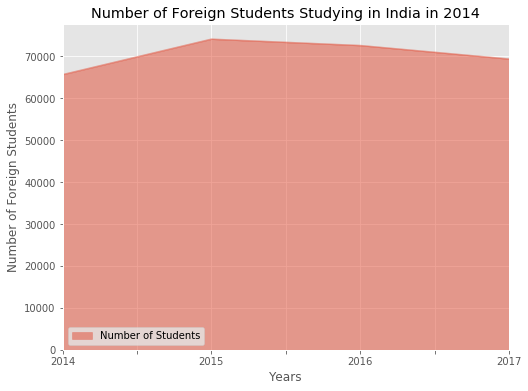

In [11]:
table_ind['Number of Students'] = table_ind['Number of Students'].astype(int)

table_ind.plot(kind='area', 
             alpha=0.5, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(8,6),
            )

plt.title('Number of Foreign Students Studying in India in 2014')
plt.ylabel('Number of Foreign Students')
plt.xlabel('Years')

plt.show()

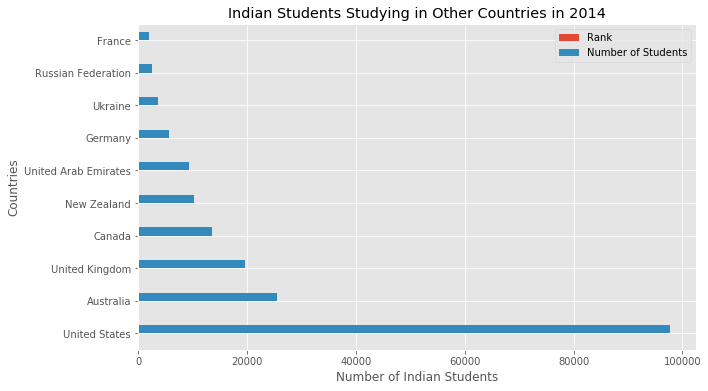

In [12]:
countries['Number of Students'] = countries['Number of Students'].astype(int)

countries.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Number of Indian Students') # add to x-label to the plot
plt.ylabel('Countries') # add y-label to the plot
plt.title('Indian Students Studying in Other Countries in 2014') # add title to the plot

plt.show()

In [13]:
compare = pd.DataFrame(columns=['Total'], index=('Inbound','Outbound'))
compare

,Total
Inbound,NaN
Outbound,NaN


In [14]:
compare.at['Inbound', 'Total'] = 65602
compare.at['Outbound', 'Total'] = 189780

In [15]:
compare

,Total
Inbound,65602
Outbound,189780


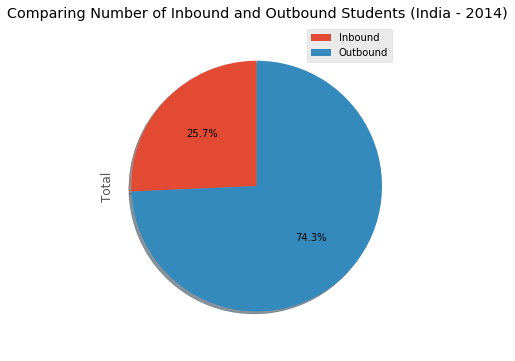

In [16]:
compare['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90°
                            shadow=True,# add shadow
                      labels = None      
                            )
plt.legend(labels=compare.index, loc='upper right') 

plt.title('Comparing Number of Inbound and Outbound Students (India - 2014)')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

### Building a model using Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lrm = LinearRegression()
lrm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
df2 = pd.DataFrame(table_ind)
df2

,index,Year,Number of Students
0,0,2014,65602
1,1,2015,74061
2,2,2016,72542
3,3,2017,69322


In [47]:
X = df2[['Year']]
Y = df2['Number of Students']

In [49]:
lrm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
Yhat=lrm.predict(X)
Yhat   [0:5]

array([68935.6, 69899.7, 70863.8, 71827.9])

In [52]:
lrm.intercept_

-1872761.8000000007

In [53]:
lrm.coef_ 

array([964.1])

In [54]:
import seaborn as sns

(0, 113977.25112859975)

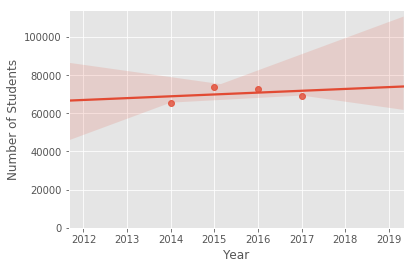

In [62]:
df2['Year'] = df2['Year'].astype(int)
width = 6
height = 4
plt.figure(figsize=(width,height))
sns.regplot(x="Year", y="Number of Students", data=df2)
plt.ylim(0,)

### Using Foursquare location data for further analysis

In [17]:
CLIENT_ID = 'PMV5E0VHFOCKJV3XWKU3P4IPBXWNST132P4VQO3IVFICAX5J' #  Foursquare ID
CLIENT_SECRET = 'XMKUPWQM0GVOQ1LRCPO351TOUF2IRJKDCDTP1USDURDTSBHL' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PMV5E0VHFOCKJV3XWKU3P4IPBXWNST132P4VQO3IVFICAX5J
CLIENT_SECRET:XMKUPWQM0GVOQ1LRCPO351TOUF2IRJKDCDTP1USDURDTSBHL


### New York Data

In [18]:
address1 = 'New York, USA'

geolocator1 = Nominatim(user_agent="cal")
location = geolocator1.geocode(address1)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [19]:
search='university'
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,search)
url
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d5aa5df5f9e7900257e0a58'},
 'response': {'venues': [{'id': '49e7c7c6f964a5201b651fe3',
    'name': 'Pace University',
    'location': {'address': '1 Pace Plz',
     'crossStreet': 'btwn Nassau & Gold St',
     'lat': 40.710720122180085,
     'lng': -74.0057429526321,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.710720122180085,
       'lng': -74.0057429526321}],
     'distance': 224,
     'postalCode': '10038',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['1 Pace Plz (btwn Nassau & Gold St)',
      'New York, NY 10038',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1ae941735',
      'name': 'University',
      'pluralName': 'Universities',
      'shortName': 'University',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-156622179

In [21]:
#converting the data into a dataframe
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
ny_uni= json_normalize(venues)
ny_uni.head()
print(ny_uni.shape)

(30, 19)


In [22]:
#Filtering or preparing the data
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in ny_uni.columns if col.startswith('location.')] + ['id']
ny = ny_uni.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
ny['categories'] = ny.apply(get_category_type, axis=1)

# clean column names by keeping only last term
ny.columns = [column.split('.')[-1] for column in ny.columns]

ny.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Pace University,University,1 Pace Plz,US,New York,United States,btwn Nassau & Gold St,224,"[1 Pace Plz (btwn Nassau & Gold St), New York,...","[{'label': 'display', 'lat': 40.71072012218008...",40.710720,-74.005743,NaN,10038,NY,49e7c7c6f964a5201b651fe3
1,New York University,University,25 W 4th St,US,New York,United States,NaN,2162,"[25 W 4th St, New York, NY 10012, United States]","[{'label': 'display', 'lat': 40.72951795621751...",40.729518,-73.993122,NaN,10012,NY,5058de7be4b007870dd7ad7a
2,Columbia University,University,116th St & Broadway,US,New York,United States,NaN,11137,"[116th St & Broadway, New York, NY 10027, Unit...",NaN,40.807282,-73.962849,NaN,10027,NY,4227a500f964a520c51f1fe3
3,Pace University - William St,University,163 William St,US,New York,United States,at Ann St,298,"[163 William St (at Ann St), New York, NY 1003...","[{'label': 'display', 'lat': 40.71005199665636...",40.710052,-74.006267,NaN,10038,NY,4cd03c7ca03a9eb0b458b103
4,Pace University Gym,College Gym,1 Pace Plz,US,New York,United States,btwn Nassau & Gold St,143,"[1 Pace Plz (btwn Nassau & Gold St), New York,...","[{'label': 'display', 'lat': 40.71157342144585...",40.711573,-74.005255,NaN,10038,NY,4cc0aa4522ce4688e6c63847


In [23]:
ny.drop(['neighborhood','labeledLatLngs','postalCode','crossStreet','cc'], axis=1, inplace=True)
ny.head()

,name,categories,address,city,country,distance,formattedAddress,lat,lng,state,id
0,Pace University,University,1 Pace Plz,New York,United States,224,"[1 Pace Plz (btwn Nassau & Gold St), New York,...",40.710720,-74.005743,NY,49e7c7c6f964a5201b651fe3
1,New York University,University,25 W 4th St,New York,United States,2162,"[25 W 4th St, New York, NY 10012, United States]",40.729518,-73.993122,NY,5058de7be4b007870dd7ad7a
2,Columbia University,University,116th St & Broadway,New York,United States,11137,"[116th St & Broadway, New York, NY 10027, Unit...",40.807282,-73.962849,NY,4227a500f964a520c51f1fe3
3,Pace University - William St,University,163 William St,New York,United States,298,"[163 William St (at Ann St), New York, NY 1003...",40.710052,-74.006267,NY,4cd03c7ca03a9eb0b458b103
4,Pace University Gym,College Gym,1 Pace Plz,New York,United States,143,"[1 Pace Plz (btwn Nassau & Gold St), New York,...",40.711573,-74.005255,NY,4cc0aa4522ce4688e6c63847


In [24]:
print (ny.shape)

(30, 11)


In [25]:
ny_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(ny['lat'], ny['lng'], ny['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ny_map)  
    
ny_map

### Rajasthan Data

In [26]:
address2 = 'Rajasthan, India'

geolocator2 = Nominatim(user_agent="raj")
location2 = geolocator2.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('The geograpical coordinate of Rajasthan are {}, {}.'.format(latitude2, longitude2))

The geograpical coordinate of Rajasthan are 26.8105777, 73.7684549.


In [27]:
search='university'
radius = 342239000
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude2, longitude2, VERSION,search,radius)
url
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d5aa6075f9e7900257f0f46'},
 'response': {'venues': [{'id': '50268a84e4b0a90de240b15f',
    'name': 'university Staff Colony, Jodhpur',
    'location': {'lat': 26.267945,
     'lng': 73.03771,
     'labeledLatLngs': [{'label': 'display',
       'lat': 26.267945,
       'lng': 73.03771}],
     'distance': 94576,
     'cc': 'IN',
     'country': 'India',
     'formattedAddress': ['India']},
    'categories': [],
    'referralId': 'v-1566221831',
    'hasPerk': False},
   {'id': '55a0e3d7498e818b3cb719eb',
    'name': 'SPUP - Sardar Patel University of Police, Security and Criminal Justice',
    'location': {'lat': 26.39725300237165,
     'lng': 73.06368129911186,
     'labeledLatLngs': [{'label': 'display',
       'lat': 26.39725300237165,
       'lng': 73.06368129911186}],
     'distance': 83891,
     'cc': 'IN',
     'country': 'India',
     'formattedAddress': ['India']},
    'categories': [{'id': '4bf58dd8d48988d1ae941735',
      'name': 'Universi

In [28]:
#converting the data into a dataframe
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
raj_uni= json_normalize(venues)
raj_uni.head()
print(raj_uni.shape)

(8, 17)


In [29]:
#Filtering or preparing the data
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in raj_uni.columns if col.startswith('location.')] + ['id']
raj = raj_uni.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
raj['categories'] = raj.apply(get_category_type, axis=1)

# clean column names by keeping only last term
raj.columns = [column.split('.')[-1] for column in raj.columns]

raj.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,"university Staff Colony, Jodhpur",None,NaN,IN,NaN,India,NaN,94576,[India],"[{'label': 'display', 'lat': 26.267945, 'lng':...",26.267945,73.037710,NaN,NaN,50268a84e4b0a90de240b15f
1,"SPUP - Sardar Patel University of Police, Secu...",University,NaN,IN,NaN,India,NaN,83891,[India],"[{'label': 'display', 'lat': 26.39725300237165...",26.397253,73.063681,NaN,NaN,55a0e3d7498e818b3cb719eb
2,"university Staff Colony, Jodhpur",None,NaN,IN,NaN,India,NaN,95675,[India],"[{'label': 'display', 'lat': 26.261844, 'lng':...",26.261844,73.029049,NaN,NaN,50268b0ce4b08ea913aca0ed
3,National Law University,Law School,NLU,IN,Jodhpur,India,Nau meel road,86116,"[NLU (Nau meel road), Jodhpur, Rājasthān, India]","[{'label': 'display', 'lat': 26.36182935467740...",26.361829,73.063791,NaN,Rājasthān,4e09fbd52271dfa46bc0244f
4,M D S University,University,NaN,IN,Ajmer,India,NaN,97704,"[Ajmer, Rājasthān, India]","[{'label': 'display', 'lat': 26.49995195659502...",26.499952,74.686970,NaN,Rājasthān,4e38e72014959f8577a3df50


In [30]:
raj.drop(['labeledLatLngs','postalCode','crossStreet','cc'], axis=1, inplace=True)
raj.head()

,name,categories,address,city,country,distance,formattedAddress,lat,lng,state,id
0,"university Staff Colony, Jodhpur",None,NaN,NaN,India,94576,[India],26.267945,73.037710,NaN,50268a84e4b0a90de240b15f
1,"SPUP - Sardar Patel University of Police, Secu...",University,NaN,NaN,India,83891,[India],26.397253,73.063681,NaN,55a0e3d7498e818b3cb719eb
2,"university Staff Colony, Jodhpur",None,NaN,NaN,India,95675,[India],26.261844,73.029049,NaN,50268b0ce4b08ea913aca0ed
3,National Law University,Law School,NLU,Jodhpur,India,86116,"[NLU (Nau meel road), Jodhpur, Rājasthān, India]",26.361829,73.063791,Rājasthān,4e09fbd52271dfa46bc0244f
4,M D S University,University,NaN,Ajmer,India,97704,"[Ajmer, Rājasthān, India]",26.499952,74.686970,Rājasthān,4e38e72014959f8577a3df50


In [31]:
raj_map = folium.Map(location=[latitude2, longitude2], zoom_start=8)

# add markers to map
for lat, lng, label in zip(raj['lat'], raj['lng'], raj['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(raj_map)  
    
raj_map

### Comparing the data

In [32]:
pie2 = pd.DataFrame(columns=['Number of Universities'], index=('New York','Rajasthan'))
pie2.at['New York', 'Number of Universities'] = 30
pie2.at['Rajasthan', 'Number of Universities'] = 8
pie2

,Number of Universities
New York,30
Rajasthan,8


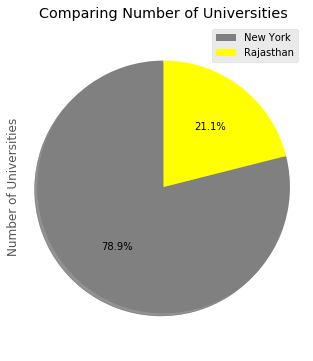

In [33]:
colorlist = ['grey','yellow']
pie2['Number of Universities'].plot(kind='pie',
                            figsize=(5, 6),
                                    colors = colorlist,
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90°
                            shadow=True,# add shadow
                      labels = None      
                            )
plt.legend(labels=pie2.index, loc='upper right') 

plt.title('Comparing Number of Universities')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()